# Quick Fun With Climate Data
Patrick Old  
May 2020

In [1]:
import xarray
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.animation as animation
import calendar

# WOA Data

Source: https://www.nodc.noaa.gov/cgi-bin/OC5/woa18/woa18.pl

One of the datasets and its information are seen below. Note the 4-D nature of the dataset, and the varieties of temperature data provided (included our variable of choice, t_an representing the interpolated statistical mean for each dataset).

In [2]:
data = xarray.load_dataset("woa_data/woa18_95A4_t14_04.nc", decode_times=False)
data

<xarray.Dataset>
Dimensions:             (depth: 102, lat: 720, lon: 1440, nbounds: 2, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
  * lon                 (lon) float32 -179.875 -179.625 ... 179.625 179.875
  * depth               (depth) float32 0.0 5.0 10.0 ... 5300.0 5400.0 5500.0
  * time                (time) float32 52.5
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 -2147483647
    lat_bnds            (lat, nbounds) float32 -90.0 -89.75 ... 89.75 90.0
    lon_bnds            (lon, nbounds) float32 -180.0 -179.75 ... 179.75 180.0
    depth_bnds          (depth, nbounds) float32 0.0 2.5 2.5 ... 5450.0 5500.0
    climatology_bounds  (time, nbounds) float32 3.0 114.0
    t_an                (time, depth, lat, lon) float32 nan nan nan ... nan nan
    t_mn                (time, depth, lat, lon) float32 nan nan nan ... nan nan
    t_dd                (time, depth, lat, lon) float64 nan nan nan ... nan nan
    t_sd                (time, depth, lat, lon) float32 nan nan nan ... nan nan
    t_se                (time, depth, lat, lon) float32 nan nan nan ... nan nan
    t_oa                (time, depth, lat, lon) float32 nan nan nan ... nan nan
    t_ma                (time, depth, lat, lon) float32 nan nan nan ... nan nan
    t_gp                (time, depth, lat, lon) float64 nan nan nan ... nan nan
Attributes:
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    id:                              woa18_95A4_t14_04.nc
    naming_authority:                gov.noaa.ncei
    sea_name:                        World-Wide Distribution
    time_coverage_start:             1995-04-01
    time_coverage_end:               2004-04-30
    time_coverage_duration:          P10Y
    time_coverage_resolution:        P03M
    geospatial_lat_min:              -90.0
    geospatial_lat_max:              90.0
    geospatial_lon_min:              -180.0
    geospatial_lon_max:              180.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_max:         5500.0
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       0.25 degrees
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       0.25 degrees
    geospatial_vertical_units:       m
    geospatial_vertical_resolution:  SPECIAL
    geospatial_vertical_positive:    down
    creator_name:                    Ocean Climate Laboratory
    creator_email:                   NCEI.info@noaa.gov
    creator_url:                     http://www.ncei.noaa.gov
    creator_type:                    group
    creator_institution:             National Centers for Environmental Infor...
    project:                         World Ocean Atlas Project
    processing_level:                processed
    keywords:                        Oceans< Ocean Temperature > Water Temper...
    keywords_vocabulary:             ISO 19115
    standard_name_vocabulary:        CF Standard Name Table v49
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    cdm_data_type:                   Grid
    publisher_name:                  National Centers for Environmental Infor...
    publisher_institution:           National Centers for Environmental Infor...
    publisher_type:                  institution
    publisher_url:                   http://www.ncei.noaa.gov/
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    l

### Load In All Data Files
Below the six files are loaded in and output as a numpy array. As each file represents a specific decade of observational temperature measurements, this is a 3-D array representing 2-D space and time.

In [3]:
def load_woa(data_dir = "woa_data/"):
    """This function loads in all of the World Ocean Atlas datasets and outputs a dictionary
    mapping a year (string) to a 2-D array of surface temperature values for that time."""
    output = {}
    for i, f in enumerate(os.listdir(data_dir)):
        if '.nc' in f: # Ignore non-data files
            data = xarray.open_dataset(data_dir + f, decode_times=False) # Open one of the files
            data_interp = data['t_an'] # Get interpolated temperature mean
            data_time_mean = data_interp.mean('time') # Average out one time in the time dimension
            data_surface = data_time_mean[0,:,:] # Get surface ocean values
            output[data.time.units[13:17]] = data_surface # Map year to 2-D surface values
            data.close()
    return output

In [4]:
all_woa = load_woa()

/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [5]:
def sorted_woa_data(woa_data):
    """This function takes in a dictionary of years -> 2-D surface ocean arrays for that year. It returns
    this data in a 3-D array, sorted by year."""
    output = np.zeros((6, 720, 1440))
    for i, k in enumerate(sorted(woa_data)):
        output[i,:,:] = woa_data[k]
    return np.array(output)

In [6]:
surface_woa_sorted = sorted_woa_data(all_woa)

### Animation
The animation is created here. It is not visualized well, only as a single figure, but it is saved as a gif to use elsewhere.

In [7]:
def make_plot_titles(woa_data):
    """This function takes in a dictionary of years -> 2-D surface ocean arrays for that year. It returns
    the decade that the year is in in the form of a string."""
    output = []
    for year in sorted(woa_data): # List of keys, sorted
        output.append(year[:3] + '0s')
    return output

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


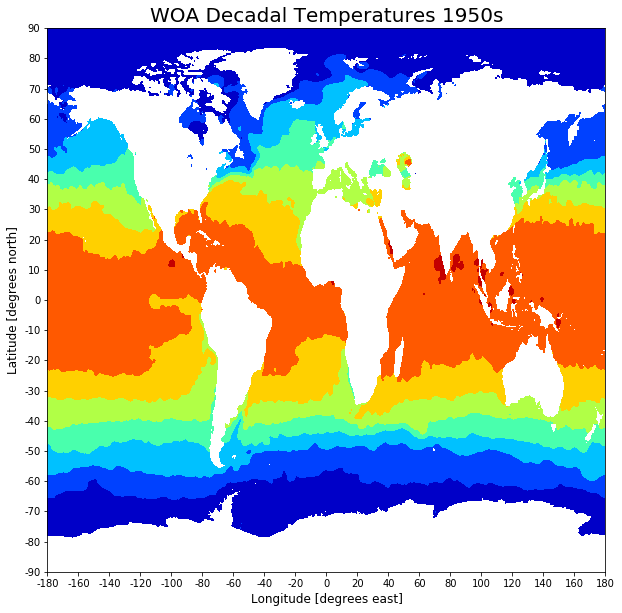

In [8]:
fig,ax = plt.subplots(figsize=(10,10))

titles = make_plot_titles(all_woa)

def animate(i):
    """This function adds animation functionality to the figure."""
    ax.clear()
    ax.contourf(surface_woa_sorted[i,:,:], cmap=plt.cm.jet)
    ax.set_title('WOA Decadal Temperatures ' + titles[i], size=20) # Set title and get title from list
    # Change axis values and labels
    ax.set_xticks(np.arange(0, 1441, 80))
    ax.set_xticklabels(np.arange(-180, 181, 20))
    ax.set_yticks(np.arange(0, 721, 40))
    ax.set_yticklabels(np.arange(-90, 91, 10))
    ax.set_xlabel("Longitude [degrees east]", size=12)
    ax.set_ylabel("Latitude [degrees north]", size=12)

interval = 0.4 # in seconds
ani = animation.FuncAnimation(fig,animate,6,interval=interval*1e+3,blit=False)

ani.save("woa_animation.gif")
plt.show()